### Codificación ordinal

En la lección anterior mencionamos que la codificación ordinal difiere de la de etiquetas. 

¿Cuál es la diferencia?

Las variables categóricas que cubrimos hasta ahora no tenían ningún tipo de orden natural implícito. Para categorías como "Plan de valor", "Plan de plata" y "Plan de cancelación", no había una forma obvia de decidir qué categoría se etiquetaba como 0, 1 o 2. Así que simplemente asignamos estas etiquetas de forma arbitraria.

Sin embargo, hacerlo no siempre es una buena idea. Imagina una variable que contiene descripciones de evaluación de calidad, como "excelente", "buena" y "mala". O quizás una variable que contenga descripciones de temperatura, como "caliente", "tibia" y "fría". Este tipo de variables categóricas tienen un orden natural, por lo que asignarles etiquetas de forma arbitraria sería un error. Si codificas "fría" con 0, "caliente" con 1 y "tibia" con 2, entonces el algoritmo funcionará suponiendo que "caliente" es una cualidad entre "fría" y "tibia", en lugar de una cualidad aún más cálida que "tibia".

Este tipo de variable categórica se denomina variable ordinal, a diferencia de una variable nominal (una variable de categorías sin orden). La codificación ordinal es una codificación de una variable ordinal con etiquetas numéricas dispuestas en un orden natural específico, generalmente realizada mediante enumeración manual de etiquetas.

Es técnicamente posible implementar la codificación ordinal mediante la clase OrdinalEncoder en sklearn. Para hacerlo, debes especificar el parámetro categories. Sin embargo, la clase OrdinalEncoder de sklearn no es fácil de usar cuando se trata de codificación ordinal, por lo que sugerimos usar una clase OrdinalEncoder alternativa de la librería category_encoders. Su parámetro mapping está mejor documentado y es mucho más intuitivo de usar. Otra alternativa es simplemente implementar el mapeo por medio de pandas. Ya que estamos usando pandas de todos modos, este es el método que recomendamos:

temperature_dict = {'cold': 0, 'warm': 1, 'hot': 2}

df['temperature'] = df['temperature'].map(temp_dict)



### Descripción general de la codificación

Averigüemos cómo elegir el método de codificación correcto y por qué la codificación de etiquetas no es adecuada para la regresión logística.
En términos generales, la codificación de etiquetas es una mala idea, especialmente para los algoritmos de regresión. Dichos algoritmos se basan en ponderaciones de aprendizaje para cada característica en una fórmula. Sin embargo, si codificamos una variable categórica con números en una sola columna, entonces el algoritmo tratará la variable como continua y asumirá que los valores están en una escala significativa. Si "gato" es 0 y "perro" es 1, no queremos que nuestro modelo piense que "perro" es de alguna manera mayor que "gato", o que operaciones aritméticas como "(gato + perro) / 2 = medio perro" tengan sentido. Tampoco queremos que el modelo use el mismo peso para varias entidades completamente diferentes.

Entonces, en caso de regresión, las categorías deben codificarse de una manera que les asigne la misma importancia a todas, pero que aún así se reconozcan como distintas y diferentes. Es por eso que OHE (One-Hot Encoding) es necesario en primer lugar. OHE codifica cada categoría como un vector linealmente independiente en un espacio N-dimensional. Todos estos vectores son inicialmente equidistantes entre sí y aprenderán sus pesos independientes separados durante la ejecución del algoritmo. Es por eso que OHE funciona bien para todos los algoritmos de machine learning que analizan todas las funciones al mismo tiempo durante el entrenamiento.

Para los algoritmos basados en árboles, OHE no es deseable por las razones que ya explicamos en una lección anterior. Todavía se puede usar, pero si se usa, es probable que las variables codificadas mediante OHE se ignoren en gran medida. El mejor enfoque para los árboles es hacer divisiones por categorías sin procesar, pero dado que scikit-learn actualmente no admite esta opción, en muchos casos, el segundo mejor enfoque resulta ser la codificación de etiquetas.

Los inconvenientes de la codificación de etiquetas se ven mitigados por el hecho de que para los árboles, aunque el orden de las etiquetas sigue siendo importante, la escala de las etiquetas no lo es. En otras palabras, no hay una diferencia real entre las etiquetas [0, 1, 2, 3] y las etiquetas [0, 2, 5, 40]. Y gracias a eso, a pesar de que la codificación de etiquetas todavía crea información que no refleja ningún hecho real y, a veces, da como resultado divisiones que no tienen ningún sentido, las aplicaciones prácticas muestran que con frecuencia da como resultado divisiones útiles, especialmente cuando se experimenta con diferentes ordenamientos de las etiquetas. Además, algunos frameworks, como LightGBM, aún pueden tratar las etiquetas numéricas como categóricas mediante configuraciones específicas, eliminando cualquier complicación relacionada con la codificación de etiquetas.

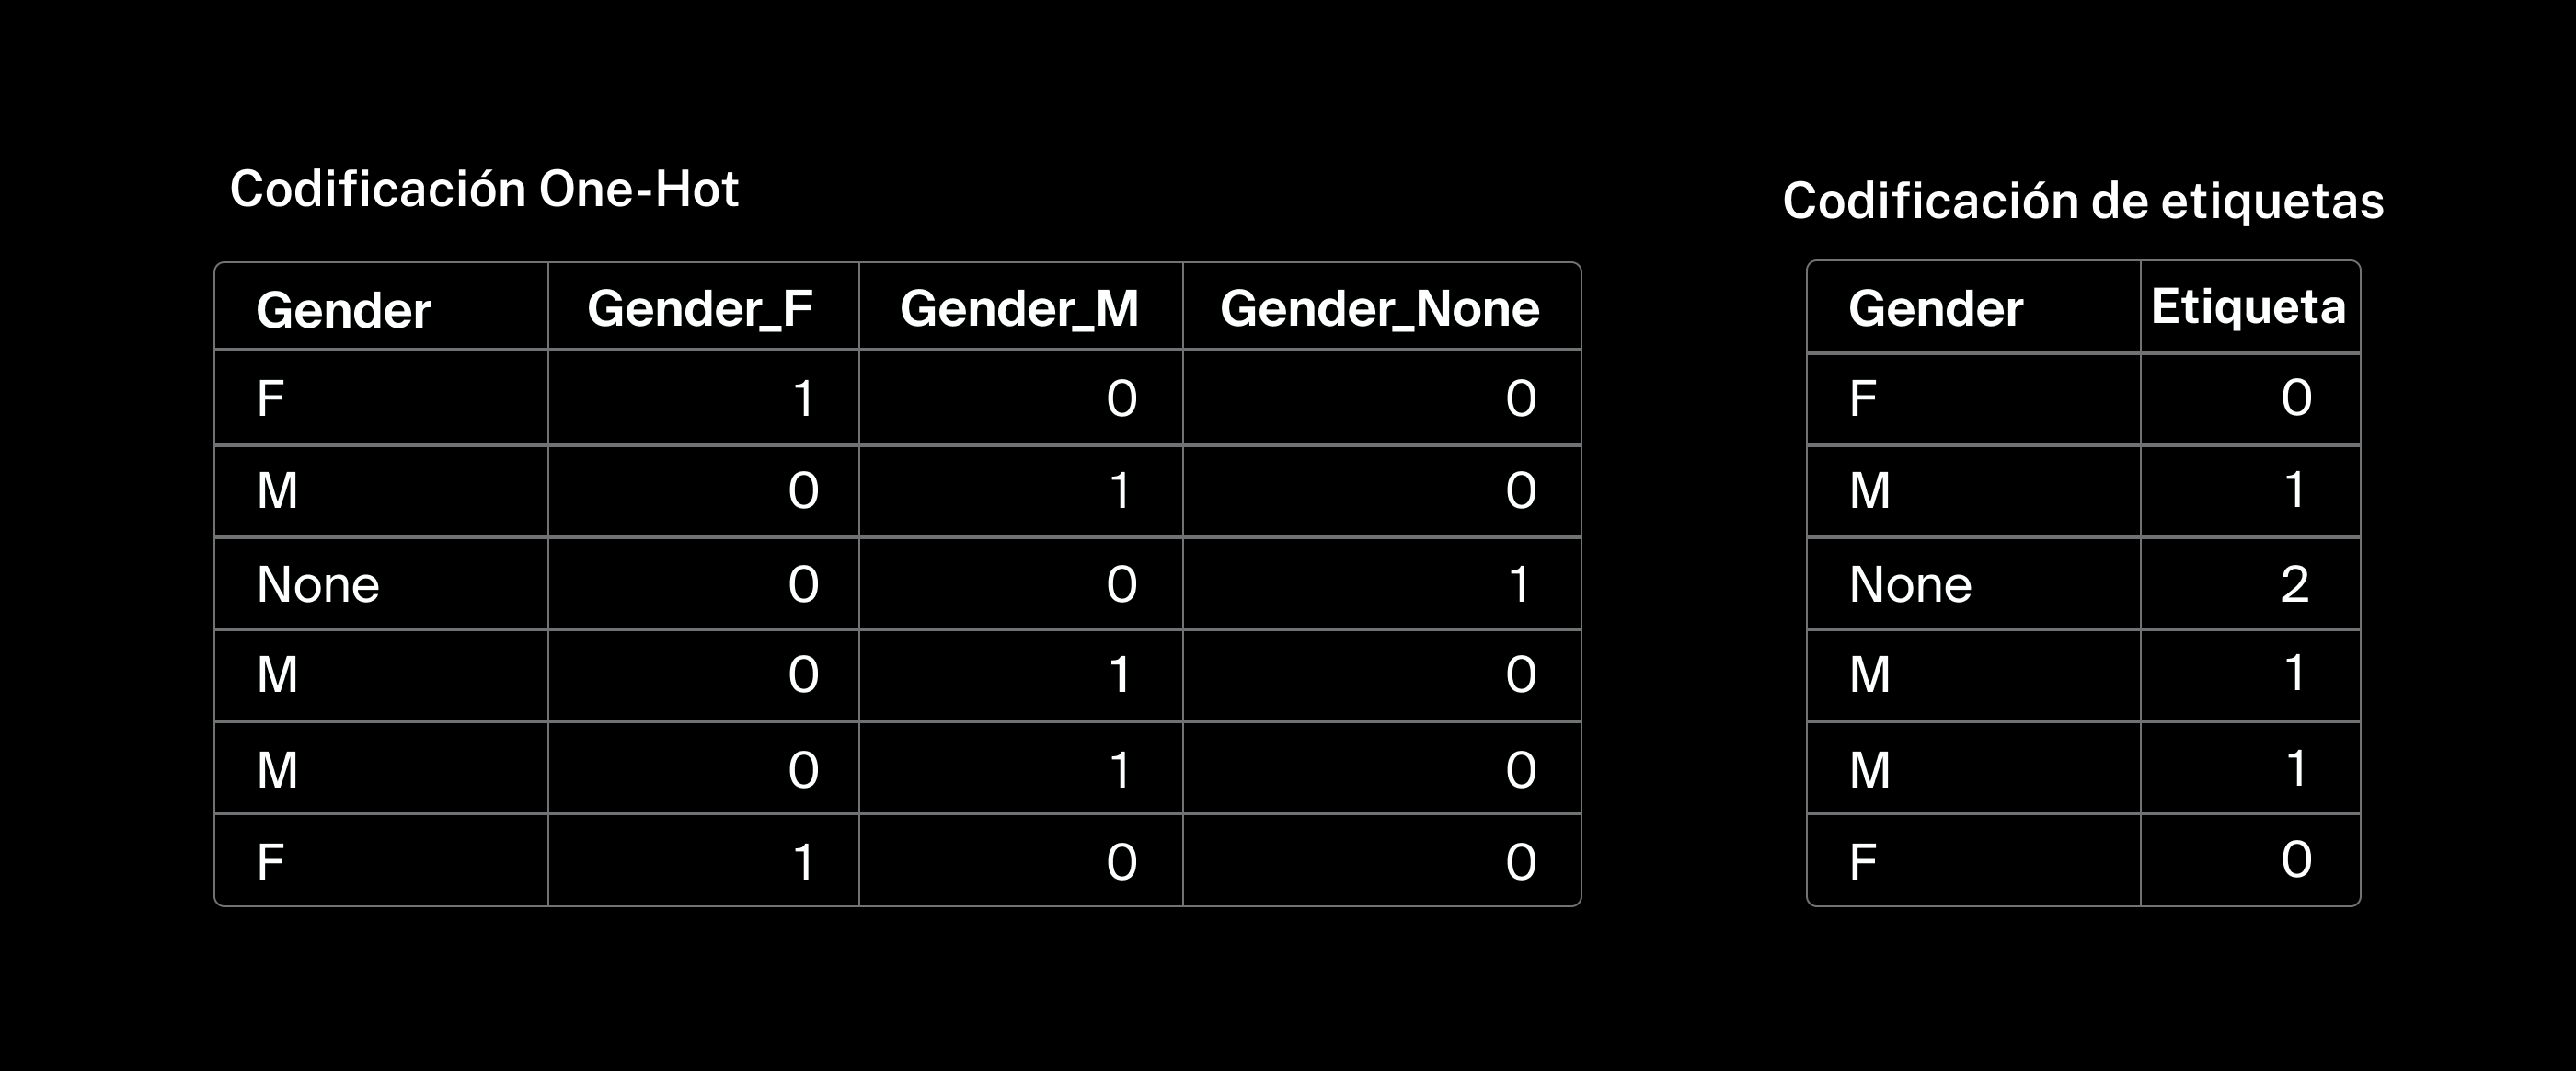

Todo lo anterior se aplica a las variables nominales. En cuanto a las variables ordinales, se recomienda utilizar la codificación ordinal para ellas, independientemente del algoritmo. A diferencia de las variables nominales, que categorizan sin un orden inherente, las variables ordinales sí representan un orden o secuencia. Cada categoría de una variable ordinal refleja un nivel o magnitud en una escala, aunque esa escala no se mida numéricamente. Un ejemplo común es la medición de la satisfacción o la intensidad del dolor, donde 'no se puede medir la felicidad' directamente, pero sí se pueden ordenar los niveles de felicidad percibida de menor a mayor. 

Por lo tanto, es razonable suponer que una variable ordinal tenga un solo peso en la regresión. Si la propiedad de ser "fría" es importante para la predicción, entonces cualquier otra temperatura es igualmente importante. Es por eso que representarlos como números en una sola columna por lo general funciona mejor que OHE, siempre que el orden de las etiquetas sea correcto.

Finalmente, también es importante señalar que cuantas más categorías tenga que codificar la variable, mayores serán los inconvenientes de OHE. Las variables que tienen muchas categorías se denominan variables de alta cardinalidad, y el uso de OHE para codificarlas conduce a un alto consumo de memoria, escasez de datos y otros problemas típicamente asociados con la alta dimensionalidad de los datos. Si bien todavía se puede usar OHE, es probable que las técnicas de codificación más avanzadas (codificación binaria, hashing, codificadores bayesianos, etc.) brinden mejores resultados. Sin embargo, no los cubriremos porque, por el momento, OHE será suficiente.

Para resumir todo, la codificación de una variable categórica con OHE generalmente dará como resultado el mejor rendimiento a menos que:

Se use en un algoritmo basado en árboles (algunas plataformas de machine learning admiten variables categóricas no codificadas para árboles, pero si no, la codificación de etiquetas puede dar como resultado un mejor rendimiento en algunos casos).

Sea una variable ordinal (la codificación ordinal generalmente funciona mejor para las variables ordinales).
Sea una variable de alta cardinalidad (es posible que se necesiten técnicas de codificación más avanzadas).

De ahora en adelante, usaremos OHE solo para codificar variables categóricas. Nuestro conjunto de datos no contiene ninguna variable ordinal que requiera codificación ordinal, y evitaremos usar la codificación de etiquetas para simplificar. OHE es una técnica de codificación universal que nos dará resultados decentes aunque no es óptima para los árboles.


